## Sales Forecast Time series

In [338]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
from datetime import datetime

In [339]:
df = pd.read_csv("/Users/prateek/Desktop/abcd/Sales.csv")

In [340]:
df.head()

Date  Sales_Quantity
0  1/1/12         3002666
1  2/1/12         4401553
2  3/1/12         3205279
3  4/1/12         4245349
4  5/1/12         3001940

In [341]:
df.plot()

In [342]:
#Change datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
Date              48 non-null datetime64[ns]
Sales_Quantity    48 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 848.0 bytes


In [343]:
df.describe()

Sales_Quantity
count    4.800000e+01
mean     3.899384e+06
std      6.703477e+05
min      2.798343e+06
25%      3.263457e+06
50%      3.819812e+06
75%      4.403886e+06
max      5.431651e+06

In [344]:
df['Sales_Quantity'].max()

5431651

In [345]:
df['Sales_Quantity'].min()

2798343

In [346]:
#set index as date
df = df.set_index('Date')
df.head()

Sales_Quantity
Date                      
2012-01-01         3002666
2012-02-01         4401553
2012-03-01         3205279
2012-04-01         4245349
2012-05-01         3001940

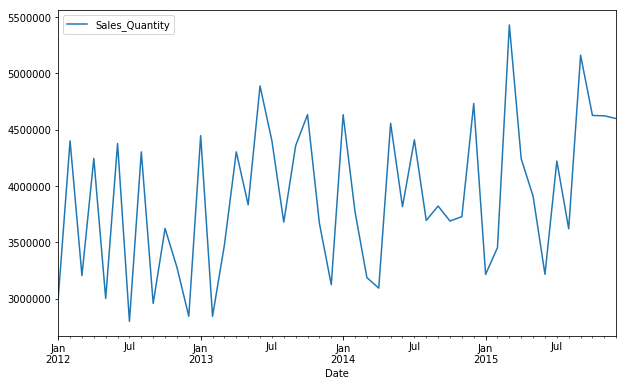

In [347]:
df.plot()

In [348]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

Shows upward trend and seasonality

In [349]:
#Check difference in mean by splitting data in half and compare
X = df
split = round(len(df) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
print('mean1=%f, mean2=%f' % (mean1, mean2))

mean1=3737675.750000, mean2=4061091.791667


In [350]:
#rolling stats
rollmean = df.rolling(window=12).mean()

rollstd = df.rolling(window=12).std()
print(rollmean, rollstd)

            Sales_Quantity
Date                      
2012-01-01             NaN
2012-02-01             NaN
2012-03-01             NaN
2012-04-01             NaN
2012-05-01             NaN
2012-06-01             NaN
2012-07-01             NaN
2012-08-01             NaN
2012-09-01             NaN
2012-10-01             NaN
2012-11-01             NaN
2012-12-01    3.503418e+06
2013-01-01    3.623828e+06
2013-02-01    3.494012e+06
2013-03-01    3.516668e+06
2013-04-01    3.521528e+06
2013-05-01    3.590874e+06
2013-06-01    3.633469e+06
2013-07-01    3.767070e+06
2013-08-01    3.715086e+06
2013-09-01    3.831758e+06
2013-10-01    3.915980e+06
2013-11-01    3.948584e+06
2013-12-01    3.971934e+06
2014-01-01    3.987472e+06
2014-02-01    4.064898e+06
2014-03-01    4.040728e+06
2014-04-01    3.939896e+06
2014-05-01    4.000169e+06
2014-06-01    3.910839e+06
2014-07-01    3.911617e+06
2014-08-01    3.912855e+06
2014-09-01    3.868224e+06
2014-10-01    3.789493e+06
2014-11-01    3.794351e+06
2

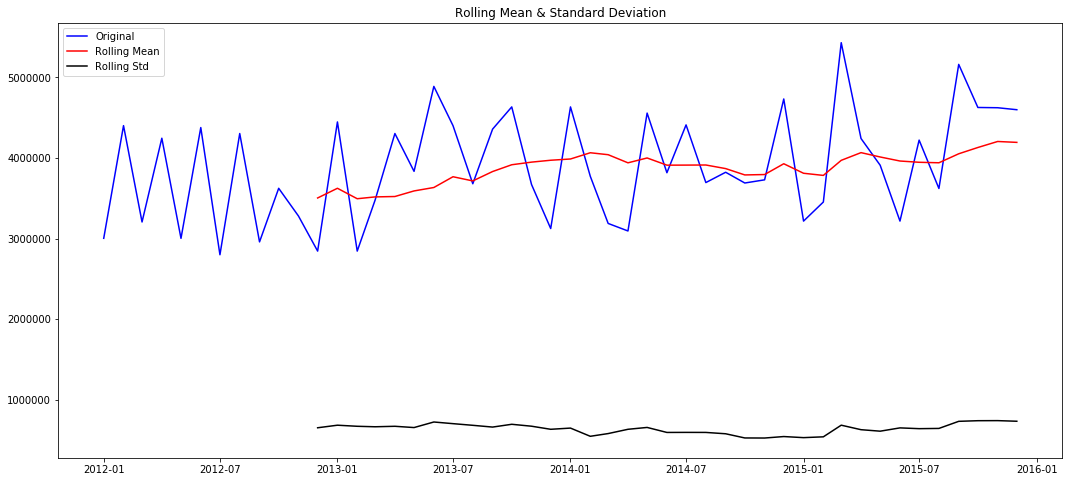

In [351]:
orig = plt.plot(df, color='blue', label = 'Original')
mean = plt.plot(rollmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rollstd, color = 'black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Data shows trend and seasonality. Mean and Standard Deviation is not constant overtime. We can further check its stationarity by using autocorrelation plot and Dickey-Fuller test.

In [352]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
test = adfuller(df['Sales_Quantity'], autolag='AIC')

output = pd.Series(test[0:4], index=['Test Statistic', 'p-value', '#lags used', 'Number of Observations used'])
for key,value in test[4].items():
 output['Critical Value (%s)'%key] = value
print(output)




Results of Dickey-Fuller Test:
Test Statistic                -7.567702e+00
p-value                        2.896140e-11
#lags used                     0.000000e+00
Number of Observations used    4.700000e+01
Critical Value (1%)           -3.577848e+00
Critical Value (5%)           -2.925338e+00
Critical Value (10%)          -2.600774e+00
dtype: float64


## Estimating Trend  

### Making Data stationary

In [353]:
#take log of data
loggeddf = np.log(df)
plt.plot(loggeddf)

In [354]:
#rolling stats
rollmeanlog = loggeddf.rolling(window=12).mean()

rollstdlog = loggeddf.rolling(window=12).std()
print(rollmeanlog, rollstdlog)

            Sales_Quantity
Date                      
2012-01-01             NaN
2012-02-01             NaN
2012-03-01             NaN
2012-04-01             NaN
2012-05-01             NaN
2012-06-01             NaN
2012-07-01             NaN
2012-08-01             NaN
2012-09-01             NaN
2012-10-01             NaN
2012-11-01             NaN
2012-12-01       15.053932
2013-01-01       15.086671
2013-02-01       15.050268
2013-03-01       15.057053
2013-04-01       15.058190
2013-05-01       15.078579
2013-06-01       15.087782
2013-07-01       15.125526
2013-08-01       15.112477
2013-09-01       15.144768
2013-10-01       15.165270
2013-11-01       15.174663
2013-12-01       15.182494
2014-01-01       15.185916
2014-02-01       15.209475
2014-03-01       15.202217
2014-04-01       15.174708
2014-05-01       15.189109
2014-06-01       15.168483
2014-07-01       15.168659
2014-08-01       15.168995
2014-09-01       15.158068
2014-10-01       15.139069
2014-11-01       15.140382
2

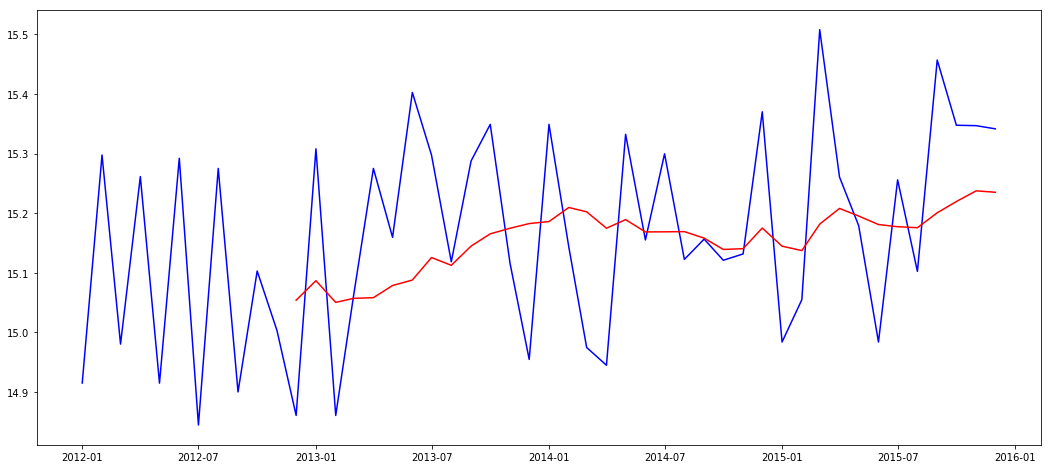

In [355]:
plt.plot(loggeddf, 'b')
plt.plot(rollmeanlog, 'r')

Mean is not stationary

In [356]:

loggeddfminusmean = loggeddf - rollmeanlog
loggeddfminusmean.head(12)

Sales_Quantity
Date                      
2012-01-01             NaN
2012-02-01             NaN
2012-03-01             NaN
2012-04-01             NaN
2012-05-01             NaN
2012-06-01             NaN
2012-07-01             NaN
2012-08-01             NaN
2012-09-01             NaN
2012-10-01             NaN
2012-11-01             NaN
2012-12-01       -0.193293

In [357]:
loggeddfminusmean.dropna(inplace=True)
loggeddfminusmean.head(10)

Sales_Quantity
Date                      
2012-12-01       -0.193293
2013-01-01        0.221200
2013-02-01       -0.189629
2013-03-01        0.004672
2013-04-01        0.216788
2013-05-01        0.080862
2013-06-01        0.314699
2013-07-01        0.171942
2013-08-01        0.005909
2013-09-01        0.142812

In [358]:
#Define ADCF test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label= 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black', label = 'Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Sales_Quantity'], autolag = 'AIC')
    dfoutput= pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#lags used', 'Number of Observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

In [359]:
test_stationarity(loggeddfminusmean)

Results of Dickey-Fuller Test:
Test Statistic                -6.218412e+00
p-value                        5.295955e-08
#lags used                     0.000000e+00
Number of Observations used    3.600000e+01
Critical Value (1%)           -3.626652e+00
dtype: float64
Test Statistic                -6.218412e+00
p-value                        5.295955e-08
#lags used                     0.000000e+00
Number of Observations used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
dtype: float64
Test Statistic                -6.218412e+00
p-value                        5.295955e-08
#lags used                     0.000000e+00
Number of Observations used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64


In [360]:
# Calculate weighted average of time series
exponentialDecayweightedAverage = loggeddf.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(loggeddf)
plt.plot(exponentialDecayweightedAverage, color='red')
# weigheted average shows upward trend below

In [361]:
loggeddfminusexponentialweightedAverage = loggeddf - exponentialDecayweightedAverage
test_stationarity(loggeddfminusexponentialweightedAverage)

Results of Dickey-Fuller Test:
Test Statistic                -8.337036e+00
p-value                        3.251333e-13
#lags used                     0.000000e+00
Number of Observations used    4.700000e+01
Critical Value (1%)           -3.577848e+00
dtype: float64
Test Statistic                -8.337036e+00
p-value                        3.251333e-13
#lags used                     0.000000e+00
Number of Observations used    4.700000e+01
Critical Value (1%)           -3.577848e+00
Critical Value (5%)           -2.925338e+00
dtype: float64
Test Statistic                -8.337036e+00
p-value                        3.251333e-13
#lags used                     0.000000e+00
Number of Observations used    4.700000e+01
Critical Value (1%)           -3.577848e+00
Critical Value (5%)           -2.925338e+00
Critical Value (10%)          -2.600774e+00
dtype: float64


In [362]:
#Shift values, which were earlier subtracted from mean
df_diffShifting = loggeddf - loggeddf.shift()
plt.plot(df_diffShifting)

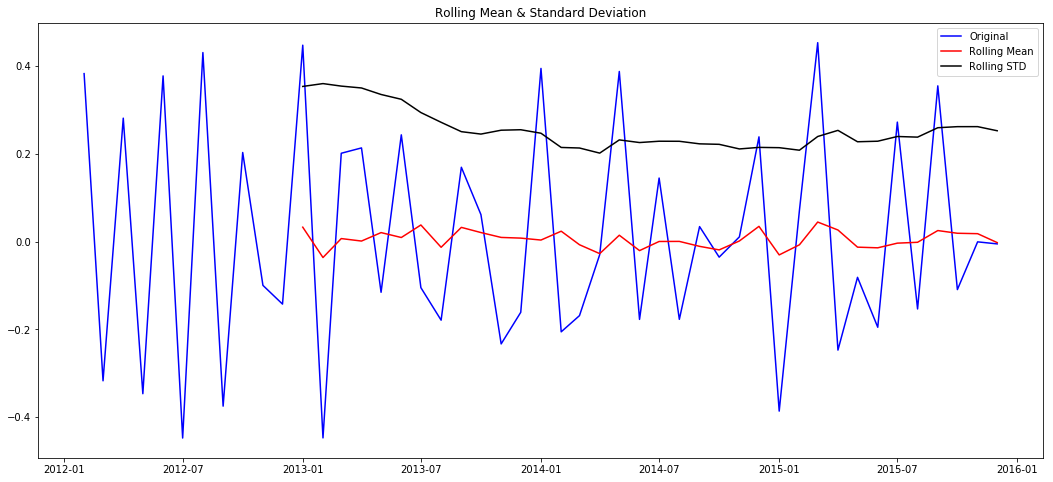

Results of Dickey-Fuller Test:
Test Statistic                 -5.384296
p-value                         0.000004
#lags used                      3.000000
Number of Observations used    43.000000
Critical Value (1%)            -3.592504
dtype: float64
Test Statistic                 -5.384296
p-value                         0.000004
#lags used                      3.000000
Number of Observations used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
dtype: float64
Test Statistic                 -5.384296
p-value                         0.000004
#lags used                      3.000000
Number of Observations used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


In [363]:
df_diffShifting.dropna(inplace=True)
test_stationarity(df_diffShifting)

### Time series is stationary now. Mean and STD are constant

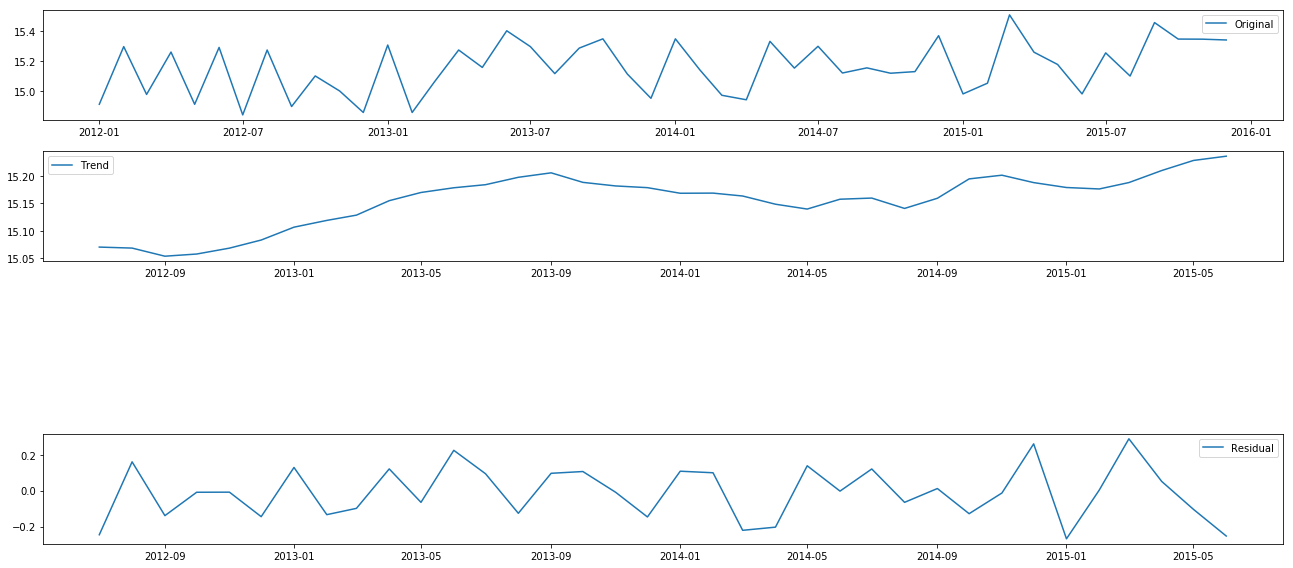

In [364]:
#segregate trend, original, residual (Irregularities)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(loggeddf)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(loggeddf, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()


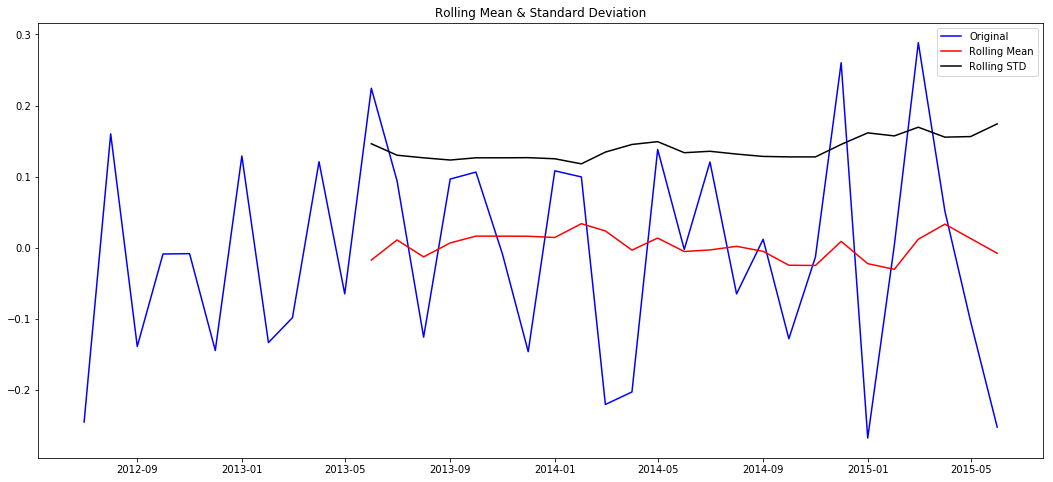

Results of Dickey-Fuller Test:
Test Statistic                -6.133474e+00
p-value                        8.293918e-08
#lags used                     1.000000e+00
Number of Observations used    3.400000e+01
Critical Value (1%)           -3.639224e+00
dtype: float64
Test Statistic                -6.133474e+00
p-value                        8.293918e-08
#lags used                     1.000000e+00
Number of Observations used    3.400000e+01
Critical Value (1%)           -3.639224e+00
Critical Value (5%)           -2.951230e+00
dtype: float64
Test Statistic                -6.133474e+00
p-value                        8.293918e-08
#lags used                     1.000000e+00
Number of Observations used    3.400000e+01
Critical Value (1%)           -3.639224e+00
Critical Value (5%)           -2.951230e+00
Critical Value (10%)          -2.614447e+00
dtype: float64


In [365]:
#Check if residual is stationary or not
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

In [366]:
# calclaute value of p and q for ARIMA model
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_diffShifting, nlags = 20)
lag_pacf = pacf(df_diffShifting, nlags=20, method='ols')
#acf
plt.figure(figsize= (15,5))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(df_diffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diffShifting)), linestyle='--', color='gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

#PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(df_diffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diffShifting)), linestyle='--', color='gray')
plt.xlabel('Lag')
plt.ylabel('PACF');
plt.tight_layout()




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


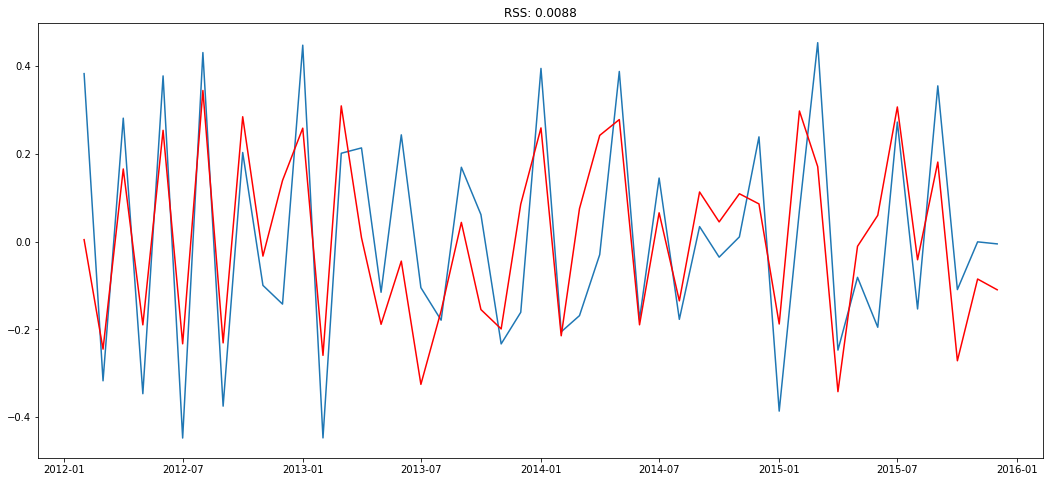

In [382]:
#ARIMA Model
from statsmodels.tsa.arima_model import ARIMA

#
model = ARIMA(loggeddf, order=(2,1,2)) #p,d,q
result_AR = model.fit(disp=False)
plt.plot(df_diffShifting)
plt.plot(result_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum(result_AR.fittedvalues-df_diffShifting['Sales_Quantity'])**2)
print('Plotting ARIMA model')
#RSS is close to zero showing good accuracy

In [383]:
predictions_Arima_diff = pd.Series(result_AR.fittedvalues, copy=True)
print(predictions_Arima_diff.head())

Date
2012-02-01    0.004339
2012-03-01   -0.244985
2012-04-01    0.165297
2012-05-01   -0.189741
2012-06-01    0.253343
dtype: float64


In [369]:
#convert to cumalative sum
predictions_Arima_diff_cumsum = predictions_Arima_diff.cumsum()

In [372]:
print(predictions_Arima_diff_cumsum.head())

Date
2012-02-01    0.004339
2012-03-01   -0.240646
2012-04-01   -0.075349
2012-05-01   -0.265090
2012-06-01   -0.011747
dtype: float64


In [373]:
predictions_Arima_log = pd.Series(loggeddf['Sales_Quantity'].ix[0], index = loggeddf.index)
predictions_Arima_log = predictions_Arima_log.add(predictions_Arima_diff_cumsum, fill_value=0)
predictions_Arima_log.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2012-01-01    14.915011
2012-02-01    14.919350
2012-03-01    14.674365
2012-04-01    14.839662
2012-05-01    14.649921
dtype: float64

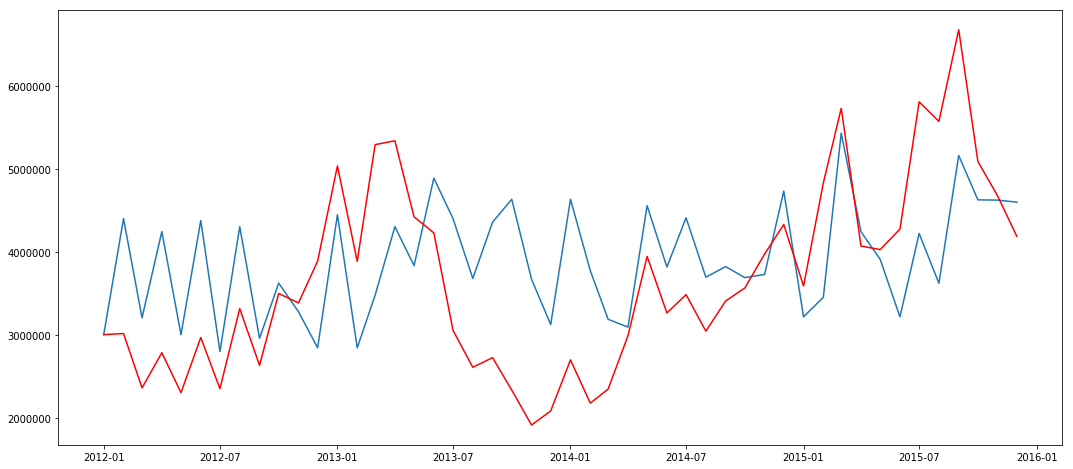

In [387]:
predictions_Arima = np.exp(predictions_Arima_log)
plt.plot(df)
plt.plot(predictions_Arima, color = 'r')

In [195]:
predictions_Arima

Date
2012-01-01    3.002666e+06
2012-02-01    3.015567e+06
2012-03-01    2.374618e+06
2012-04-01    2.765123e+06
2012-05-01    2.330866e+06
2012-06-01    2.945382e+06
2012-07-01    2.371490e+06
2012-08-01    3.257557e+06
2012-09-01    2.630121e+06
2012-10-01    3.386196e+06
2012-11-01    3.319282e+06
2012-12-01    3.702232e+06
2013-01-01    4.764729e+06
2013-02-01    3.626305e+06
2013-03-01    4.859294e+06
2013-04-01    4.931604e+06
2013-05-01    4.013424e+06
2013-06-01    3.890936e+06
2013-07-01    2.336488e+06
2013-08-01    2.110215e+06
2013-09-01    2.303826e+06
2013-10-01    2.021462e+06
2013-11-01    1.692970e+06
2013-12-01    1.888033e+06
2014-01-01    2.462541e+06
2014-02-01    1.986902e+06
2014-03-01    2.134178e+06
2014-04-01    2.744107e+06
2014-05-01    3.543890e+06
2014-06-01    2.900072e+06
2014-07-01    3.069979e+06
2014-08-01    2.738891e+06
2014-09-01    3.060835e+06
2014-10-01    3.236605e+06
2014-11-01    3.570257e+06
2014-12-01    3.878440e+06
2015-01-01    3.213290e

In [384]:
len(loggeddf)

48

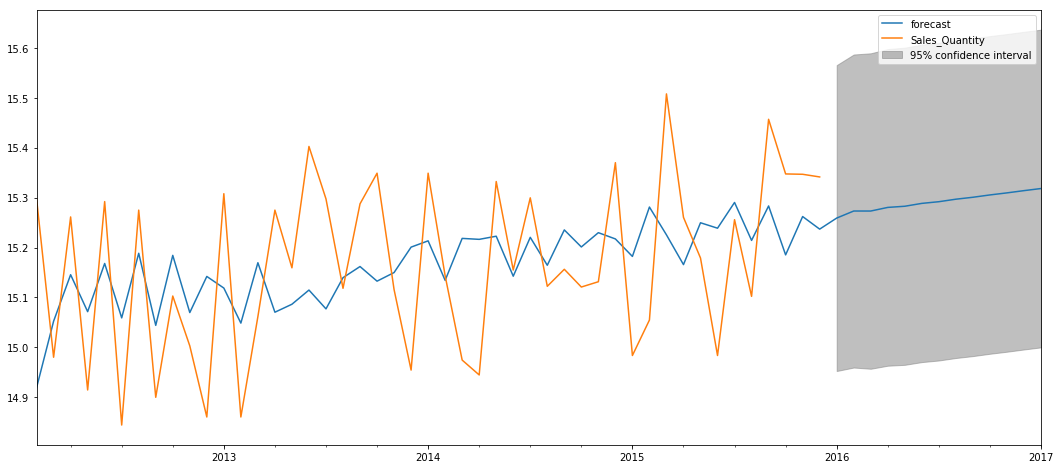

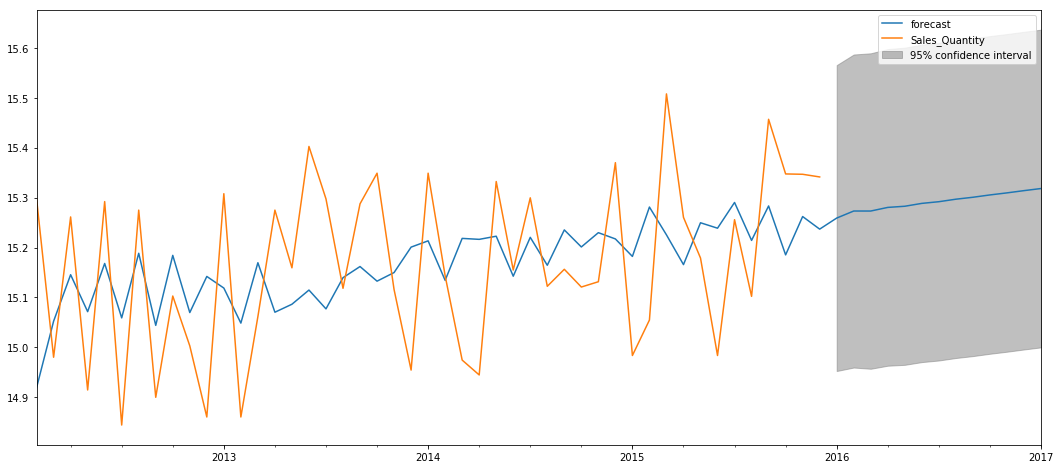

In [391]:
#forecast next 1 year
result_AR.plot_predict(1,60)
#x=results_Arima.forecast(steps=12)
# These are logged values